#  Notebook para determinação da quantidade de chuva (mm) - PERIODO SECO

## Importações e Configurações iniciais

In [49]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sn

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import  metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 150)
pd.set_option("display.min_rows", 20)

import matplotlib.pyplot as plt

import seaborn as sns # Statistical data visualization

import plotly.graph_objects as go
import plotly.express as px
from keras.models import Sequential
from keras.layers import LSTM, SimpleRNN, Dense, Dropout, Masking, Embedding

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Análise Exploratória dos Dados

In [50]:
#Tratamento de dados
missing_values = ['n/a','na','*****','*','*******',' -', '******', '5..84', '3..66', '3.3.21', '1..41', '********', '3.7.94', '354.59*', '564..79', '5.04.24', '21:36','**********', '***', '*********', '03:18', '00:00', '03:48', '08:42', '03:06', '09:06', '01:30', '07:48', '09:12', '10:18', '01:24', '#VALUE!' , '926,4923,8', '27/07/1902**21:36:00', '-', '926.4923.8','185.488.992']

dados_clima = pd.read_csv('C:/Users/auped/OneDrive - Universidade Federal de Uberlândia/Área de Trabalho/python 05-11/pesquisa/dadosclima_PERIODOSECO.csv', header = None, sep=';', na_values=missing_values)
dados_clima.columns=['Temp Máx (°C)', 'Temp Mín (°C)', 'Temp Média (°C)', 'Velocidade do Vento (km/h)', 'Radiação solar (cal/cm²/h)', 'Pressão (mb)', 'UR (%)', 'Chuva (mm)', 'Mês', 'Ano', 'Chuvoso/Seco']
dados_clima['Pressão (mb)'] = dados_clima['Pressão (mb)'].str.replace(',,', '.')
dados_clima['UR (%)'] = dados_clima['UR (%)'].astype(float)
dados_clima['Pressão (mb)'] = dados_clima['Pressão (mb)'].astype(float)
dados_clima['Radiação solar (cal/cm²/h)'] = dados_clima['Radiação solar (cal/cm²/h)'].astype(float)
dados_clima['Ano'] = dados_clima['Ano'].str.replace(',,', '')
dados_clima['Ano'] = dados_clima['Ano'].astype(int)
dados_clima['UR (%)'].dropna()




combine = [dados_clima]
chuva = dados_clima['Chuva (mm)']

#Primeiras cinco linhas dos dados pós-tratados
dados_clima.head()
dados_clima.dropna()

#Número de missing values encontrdos em cada coluna
print(dados_clima.isnull().sum())

Temp Máx (°C)                    8
Temp Mín (°C)                    8
Temp Média (°C)                  7
Velocidade do Vento (km/h)     220
Radiação solar (cal/cm²/h)     252
Pressão (mb)                   194
UR (%)                        2292
Chuva (mm)                     184
Mês                              0
Ano                              0
Chuvoso/Seco                     0
dtype: int64


### Criação de uma nova classe que determina se naquele dia choveu ou não

In [51]:

# Loop que preenche a nova coluna com 0(não choveu) e 1(choveu)
for dados_clima in combine:    
    dados_clima.loc[ dados_clima['Chuva (mm)'] == 0, 'Choveu?'] = 0
    dados_clima.loc[(dados_clima['Chuva (mm)'] > 0), 'Choveu?'] = 1

#Visualização das primeiras cinco linhas da tabela
dados_clima.head()   



,Temp Máx (°C),Temp Mín (°C),Temp Média (°C),Velocidade do Vento (km/h),Radiação solar (cal/cm²/h),Pressão (mb),UR (%),Chuva (mm),Mês,Ano,Chuvoso/Seco,Choveu?
0,24.2,13.8,19.0,3.08,386.44,937.7,94.8,5.4,4.0,1984,0,1.0
1,27.6,17.4,22.5,3.61,287.35,929.6,90.2,0.0,4.0,1984,0,0.0
2,27.2,19.4,23.3,2.98,158.59,929.5,96.6,0.0,4.0,1984,0,0.0
3,24.8,17.8,21.3,2.20,168.45,929.3,NaN,0.0,4.0,1984,0,0.0
4,21.0,12.0,16.5,1.40,455.80,932.0,96.3,0.0,4.0,1984,0,0.0


In [52]:
dados_clima.describe()  


,Temp Máx (°C),Temp Mín (°C),Temp Média (°C),Velocidade do Vento (km/h),Radiação solar (cal/cm²/h),Pressão (mb),UR (%),Chuva (mm),Mês,Ano,Chuvoso/Seco,Choveu?
count,6580.000000,6580.000000,6581.000000,6368.000000,6336.000000,6394.000000,4296.000000,6404.000000,6588.000000,6588.000000,6588.0,6404.000000
mean,26.660957,12.124316,19.401292,2.982269,323.018679,930.241164,68.829586,1.791722,6.502732,2001.500000,0.0,0.181761
std,3.828162,4.140720,3.477901,2.677097,96.995011,131.833751,16.570284,6.757784,1.701541,10.389083,0.0,0.385678
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1984.000000,0.0,0.000000
25%,24.600000,9.400000,17.300000,1.390000,268.180000,930.400000,62.275000,0.000000,5.000000,1992.750000,0.0,0.000000
50%,27.000000,12.000000,19.400000,2.320000,326.970000,935.100000,71.750000,0.000000,7.000000,2001.500000,0.0,0.000000
75%,29.200000,15.000000,21.800000,3.780000,384.650000,939.100000,79.300000,0.000000,8.000000,2010.250000,0.0,0.000000
max,38.800000,27.600000,31.400000,99.200000,816.740000,9923.700000,99.900000,142.800000,9.000000,2019.000000,0.0,1.000000


In [53]:
dftabela = dados_clima.describe() 
dftabela.to_excel("tabelaestatisticaREGSECO.xlsx")

In [54]:
print('\nMissing Values no dataframe:\n',dados_clima.isnull().sum(), sep="")


Missing Values no dataframe:
Temp Máx (°C)                    8
Temp Mín (°C)                    8
Temp Média (°C)                  7
Velocidade do Vento (km/h)     220
Radiação solar (cal/cm²/h)     252
Pressão (mb)                   194
UR (%)                        2292
Chuva (mm)                     184
Mês                              0
Ano                              0
Chuvoso/Seco                     0
Choveu?                        184
dtype: int64


In [55]:
#Tratar os Missing Values (Valores Ausentes)

dados_clima['Temp Mín (°C)'].fillna(method='ffill',inplace = True)   #ffill => preencher com a última temperatura antes do Missing Value
dados_clima['Temp Média (°C)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última temperatura antes do Missing Value
dados_clima['Velocidade do Vento (km/h)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última velocidade antes do Missing Value
dados_clima['Radiação solar (cal/cm²/h)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última radiação antes do Missing Value
dados_clima['UR (%)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última taxa UR antes do Missing Value
dados_clima['Chuva (mm)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última quantidade antes do Missing Value
dados_clima['Pressão (mb)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última pressão antes do Missing Value
dados_clima['Choveu?'].fillna(method='ffill',inplace = True) #ffill => preencher com a última pressão antes do Missing Value
dados_clima['Temp Máx (°C)'].fillna(method='ffill',inplace = True)   #ffill => preencher com a última temperatura antes do Missing Value



#verificar os missing values após a imputação acima
print('\nMissing Values no dataframe  após o tratamento:\n',dados_clima.isnull().sum(), sep="")


Missing Values no dataframe  após o tratamento:
Temp Máx (°C)                 0
Temp Mín (°C)                 0
Temp Média (°C)               0
Velocidade do Vento (km/h)    0
Radiação solar (cal/cm²/h)    0
Pressão (mb)                  0
UR (%)                        0
Chuva (mm)                    0
Mês                           0
Ano                           0
Chuvoso/Seco                  0
Choveu?                       0
dtype: int64


In [56]:
# Usamos a correlação de Pearson e ordenamos os valores
columns_corr = dados_clima.corr(method='pearson')['Chuva (mm)'].sort_values()
print(columns_corr)

Velocidade do Vento (km/h)   -0.059955
Radiação solar (cal/cm²/h)   -0.051224
Mês                          -0.012686
Pressão (mb)                 -0.005298
Temp Máx (°C)                 0.027694
UR (%)                        0.128511
Temp Média (°C)               0.135155
Ano                           0.195991
Temp Mín (°C)                 0.199235
Choveu?                       0.466582
Chuva (mm)                    1.000000
Chuvoso/Seco                       NaN
Name: Chuva (mm), dtype: float64


## Seleção do Período para Análise

In [57]:
data_inicio = 1980
data_fim = 2020
data_inicio_treinamento = 1983
data_fim_treinamento = 2008
data_inicio_teste = 2009
data_fim_teste = 2019

In [58]:
dados_clima.drop(dados_clima.loc[dados_clima['Chuva (mm)']==0].index, inplace=True)


In [59]:
dadosparateste = dados_clima.copy()

#Criando uma nova coluna de chuva para ficar no final do dataframe

qtdchuva = dadosparateste['Chuva (mm)']


dadosparateste['Chuva att (mm)'] = qtdchuva

#Visualização das primeiras cinco linhas da tabela
dadosparateste.head()  

,Temp Máx (°C),Temp Mín (°C),Temp Média (°C),Velocidade do Vento (km/h),Radiação solar (cal/cm²/h),Pressão (mb),UR (%),Chuva (mm),Mês,Ano,Chuvoso/Seco,Choveu?,Chuva att (mm)
0,24.2,13.8,19.0,3.08,386.44,937.7,94.8,5.4,4.0,1984,0,1.0,5.4
6,27.0,15.2,21.1,9.74,346.80,937.7,94.7,12.2,4.0,1984,0,1.0,12.2
7,26.8,16.6,21.7,4.14,277.44,940.5,94.7,0.7,4.0,1984,0,1.0,0.7
13,29.0,16.0,22.5,1.48,326.98,935.5,88.4,1.6,4.0,1984,0,1.0,1.6
14,28.6,17.4,23.0,1.95,208.08,935.6,90.2,9.0,4.0,1984,0,1.0,9.0


In [60]:
dadosparateste.drop(columns = ['Chuva (mm)'], axis = 1, inplace=True)


## Criar funções que serão utilizadas por todos os Modelos

In [61]:
# Library para statmodels
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_percentage_error

#Definir funções que serão utilizadas por todos os modelos de predição

#Imprimir mensagens de erro da predição
def imprimir_scores_predicao(strModel, y_target, arPredict):
  #print(strModel, ' - R2: ', r2_score(y_target, arPredict))
  print(strModel, ' - MAE:  ', mean_absolute_error(y_target, arPredict))
  print(strModel, ' - MAPE: ', mean_absolute_percentage_error(y_target, arPredict))
  #print(strModel, ' - MSE: ', mean_squared_error(y_target, arPredict))
  print(strModel, ' - RMSE: ', np.sqrt(mean_squared_error(y_target, arPredict)))
  print(strModel, ' - MSE: ',mean_squared_error(y_target, arPredict))
  print(strModel, ' - R2: ',r2_score(y_target, arPredict))
  #mse = metrics.mean_squared_error(y, yhat)
  
  
def imprimir_graficos_predicao(strModel, y_target, arPredict):
  
  df_Test_Predicted = y_target.copy()
  df_Test_Predicted['Daily rain (mm)'] = arPredict

  #Plotagem dos dados de teste e dados previstos
  plt.figure(figsize=(16,8))
  plt.plot(y_target.loc['Dia'], y_target, color = 'blue', label = 'Chuva Real')
  plt.plot(y_target.loc['Dia'], arPredict, color = 'red', label = 'Chuva Prevista')
  font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 13.5,
        }
  plt.title('Comparação entre o real e o previsto pelo modelo', fontdict=font)
  plt.xlabel('Período')
  plt.ylabel('Quantidade de chuva')
  plt.legend()
  plt.grid(True)
  #plt.savefig('lstm2.pdf')
  plt.show() 

# Modelos de Aprendizado de Máquina (Machine Learning) - Regressão

In [62]:
#Criar os dataframe de Treinamento e Teste
df_train =  dadosparateste[dadosparateste['Ano'] >= data_inicio_treinamento]
df_train =  dadosparateste[dadosparateste['Ano'] <= data_fim_treinamento]
df_test = dadosparateste[dadosparateste['Ano'] >= data_inicio_teste]
df_test =  dadosparateste[dadosparateste['Ano'] <= data_fim_teste]

X_train = df_train.iloc[:,0:7]
y_train = df_train[['Chuva att (mm)']]

X_test = df_test.iloc[:,0:7]
y_test = df_test[['Chuva att (mm)']]

X_test.head()

,Temp Máx (°C),Temp Mín (°C),Temp Média (°C),Velocidade do Vento (km/h),Radiação solar (cal/cm²/h),Pressão (mb),UR (%)
0,24.2,13.8,19.0,3.08,386.44,937.7,94.8
6,27.0,15.2,21.1,9.74,346.80,937.7,94.7
7,26.8,16.6,21.7,4.14,277.44,940.5,94.7
13,29.0,16.0,22.5,1.48,326.98,935.5,88.4
14,28.6,17.4,23.0,1.95,208.08,935.6,90.2


# XGBOOST 

In [70]:
import xgboost as xgb

In [71]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 100, alpha = 1, n_estimators = 100000)

In [72]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[18:25:52] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [73]:
imprimir_scores_predicao("XGBoost", y_test, preds)


XGBoost  - MAE:   20.89319154167449
XGBoost  - MAPE:  2.0493378685112225
XGBoost  - RMSE:  50.19206043145073
XGBoost  - MSE:  2519.242930354402
XGBoost  - R2:  -0.13729935295258633


In [74]:
y_test.describe()

,Chuva att (mm)
count,1346.000000
mean,27.833425
std,47.082446
min,0.100000
25%,1.600000
50%,6.400000
75%,22.700000
max,142.800000


In [75]:
chuvaprevista = []
for z in range(len(preds)):
    #print(y_pred4[z])
    chuvaprevista.append(preds[z])
    
df_test['Previsão']= chuvaprevista
df_test.head()    

,Temp Máx (°C),Temp Mín (°C),Temp Média (°C),Velocidade do Vento (km/h),Radiação solar (cal/cm²/h),Pressão (mb),UR (%),Mês,Ano,Chuvoso/Seco,Choveu?,Chuva att (mm),Previsão
0,24.2,13.8,19.0,3.08,386.44,937.7,94.8,4.0,1984,0,1.0,5.4,5.505041
6,27.0,15.2,21.1,9.74,346.80,937.7,94.7,4.0,1984,0,1.0,12.2,12.088405
7,26.8,16.6,21.7,4.14,277.44,940.5,94.7,4.0,1984,0,1.0,0.7,0.944611
13,29.0,16.0,22.5,1.48,326.98,935.5,88.4,4.0,1984,0,1.0,1.6,1.614944
14,28.6,17.4,23.0,1.95,208.08,935.6,90.2,4.0,1984,0,1.0,9.0,8.849512


In [79]:
df_test = df_test[df_test['Ano']>= 1980]
df_test =  df_test[df_test['Ano'] <= 2019]

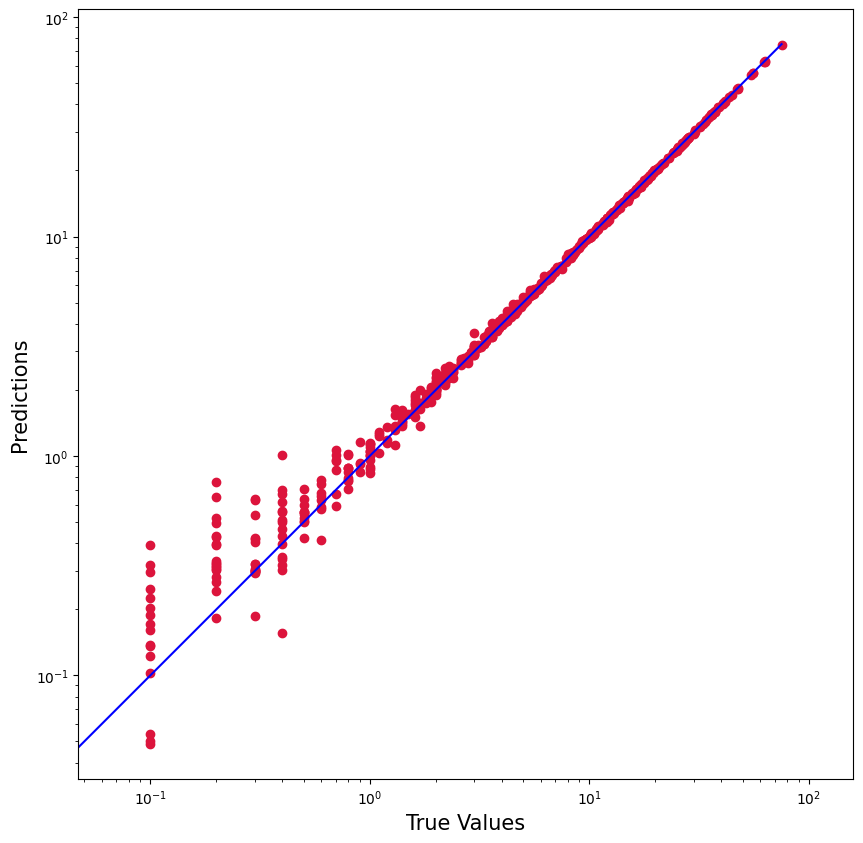

In [80]:
plt.figure(figsize=(10,10))

true_value = df_test['Chuva att (mm)']
predicted_value = df_test['Previsão']
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()